# CV-1 Assignment : CNN Basics

                                                Made by Janhavi Ghogare

In [86]:
import numpy as np
import PIL

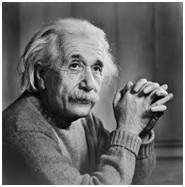

In [87]:
from PIL import Image
im = Image.open("lord_einstein.jpg")
im

In [88]:
img = np.array(im)
img = img[:, :, 0]

print(img)
print(img.shape)

[[255 244 255 ... 244 242 255]
 [243 251 230 ... 237 255 255]
 [255 244  86 ... 154 228 255]
 ...
 [255 225 106 ... 123 243 255]
 [255 255 220 ... 225 255 255]
 [230 255 240 ... 226 229 255]]
(187, 185)


## Applying the convolution operation

In [89]:
def conv(image, kernel):
    
    size = kernel.shape[0]
    result = np.zeros((image.shape))
    
    # Applying the convolution operation through the image
    for r in np.uint16(np.arange(size/2,
                        image.shape[0] - size/2-2)):
        for c in np.uint16(np.arange(size/2, image.shape[1]-size/2-2)):
            
            # getting the current region to get multiplied with the filter
            region = image[r:r+size, c:c+size]
            
            # element-wise multiplpication between the current region and the filter.
            curr_result = region * kernel
            conv_sum = np.sum(curr_result)
            result[r,c] = conv_sum
            
    return result
    
def get_kernel(name):
    # return the kernel based on the name
    
    if (name == 'Sobel X'):
        return np.array([[-1, 0, 1],
                         [-2, 0, 2],
                         [-1, 0, 1] ])
    elif (name == 'Sobel Y'):
        return np.array([[-1, -2, -1],
                         [0, 0, 0],
                         [1, 2, 1] ])
    elif (name == 'Gaussian'):
        return (1/159)*np.array([[2,4,5,4,2],
                                 [4,9,12,9,4],
                                 [5,12,15,12,5],
                                 [4,9,12,9,4],
                                 [2,4,5,4,2] ])
    else:
        raise NotImplementedError

## Checking the implementation

In [90]:
smoothened = conv(img, get_kernel('Gaussian'))
smoothened.shape

(187, 185)

In [91]:
sobel_x = conv(smoothened, get_kernel('Sobel X'))
sobel_y = conv(smoothened, get_kernel('Sobel Y'))

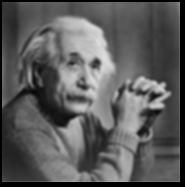

In [92]:
im1 = PIL.Image.fromarray(np.uint8(smoothened))
im1

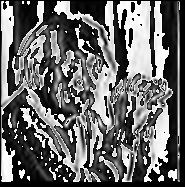

In [93]:
im2 = PIL.Image.fromarray(np.uint8(sobel_x))
im2

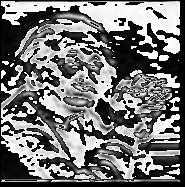

In [94]:
im3 = PIL.Image.fromarray(np.uint8(sobel_y))
im3

In [95]:
# Calculating the gradient magnitude
grad = np.sqrt(sobel_x**2 + sobel_y**2)

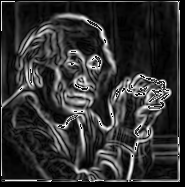

In [96]:
final_image = PIL.Image.fromarray(np.uint8(grad))
final_image

Text(0.5, 1.0, 'Final')

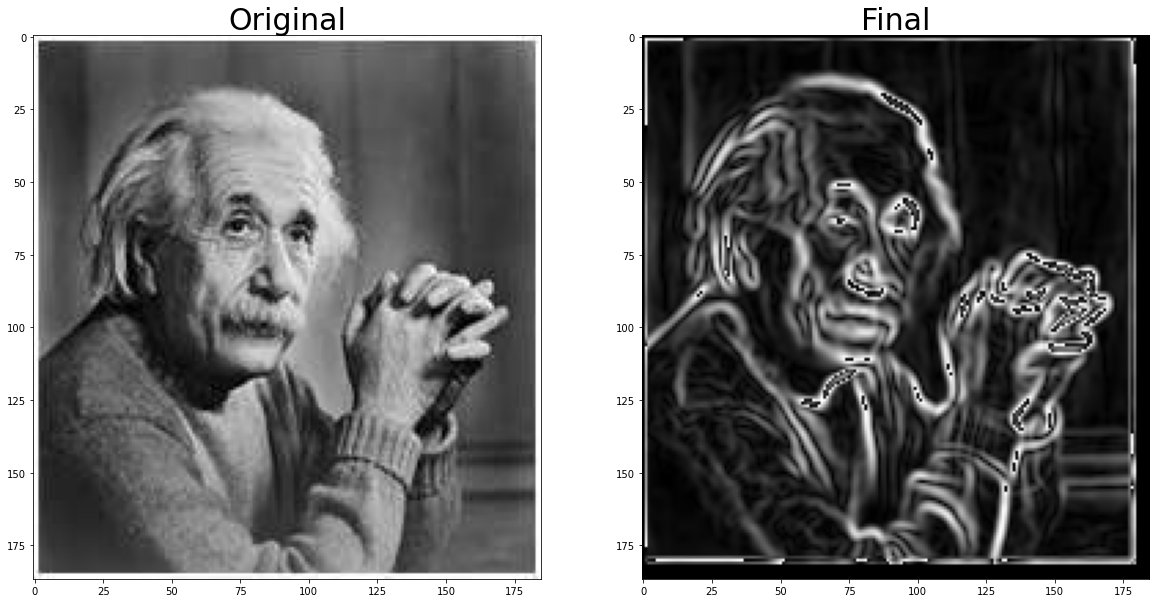

In [99]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plot1 = plt.subplot2grid((1,2), (0,0))
plot1.imshow(im, cmap='gray', aspect='auto')
plot1.set_title('Original', fontsize = 30)

plot2 = plt.subplot2grid((1,2), (0,1))
plot2.imshow(final_image, cmap='gray', aspect='auto')
plot2.set_title('Final', fontsize = 30)